In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import spacy
from collections import Counter
from string import punctuation
from matplotlib import rcParams
%matplotlib inline
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
messages = pd.read_json('apple2.json')
messages.replace(r'\n', '', regex=True, inplace=True)
messages

,Title,Date,Contributor,Content,link,Role
0,Apple charges forward to 2030 carbon neutral g...,2021-10-27,"[Keri Fulton, Apple Media Helpline]","PRESS RELEASEOctober 27, 2021 ...",https://www.apple.com/newsroom/2021/10/apple-c...,Press Contact
1,Apple introduces Apple Business Essentials,2021-11-10,"[Jessica Reeves, Todd Wilder, Apple Media Help...","PRESS RELEASENovember 10, 2021 ...",https://www.apple.com/newsroom/2021/11/apple-i...,Press Contact
2,Holiday season kicks off at Apple,2021-11-09,"[Gabi Condarco-Quesada, Nick Leahy, Apple Medi...","UPDATENovember 9, 2021 ...",https://www.apple.com/newsroom/2021/11/holiday...,Press Contact
3,Apple Reports Fourth Quarter Results,2021-10-28,"[Josh Rosenstock, Tejas Gala]","PRESS RELEASEOctober 28, 2021 ...",https://www.apple.com/newsroom/2021/10/apple-r...,Press Contact
4,Apple honors and celebrates American veterans,2021-11-11,"[Clare Varellas, Rachel Wolf Tulley, Apple Med...","UPDATENovember 11, 2021 ...",https://www.apple.com/newsroom/2021/11/apple-h...,Press Contact
...,...,...,...,...,...,...
1815,Apple Teams with Kanisa for e-Service,2000-04-05,"[Alec Rosen, Keith Goldberg, Kanisa Inc.]","PRESS RELEASEApril 5, 2000 ...",https://www.apple.com/newsroom/2000/04/05Apple...,Press Contact
1816,Apple’s QuickTime 4 Downloads Top 32 Million a...,2000-04-05,"[Vanessa Rios, Bob Berger, Edelman Worldwide]","PRESS RELEASEApril 5, 2000 ...",https://www.apple.com/newsroom/2000/04/05Apple...,Press Contact
1817,"Apple Acquires DVD Authoring Technology, Produ...",2000-04-10,[Matt Hutchison],"PRESS RELEASEApril 10, 2000 ...",https://www.apple.com/newsroom/2000/04/10Apple...,Press Contact
1818,Apple Unveils Mac OS X and Internet Strategy a...,2000-01-05,"[Matt Hutchison, Rhona Hamilton]","PRESS RELEASEJanuary 5, 2000 ...",https://www.apple.com/newsroom/2000/01/05Apple...,Press Contact


In [3]:
nlp = spacy.load("en_core_web_sm")

In [4]:
def get_hotwords(text):
    result = []
    pos_tag = ['PROPN', 'ADJ', 'NOUN']
    doc = nlp(text.lower())
    for token in doc:
        
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        
        elif(token.pos_ in pos_tag):
            result.append(token.text)
                
    return result

In [5]:
message_text = str(messages.Title.values)
output = get_hotwords(message_text)
words = [x for x in Counter(output).most_common(30)]

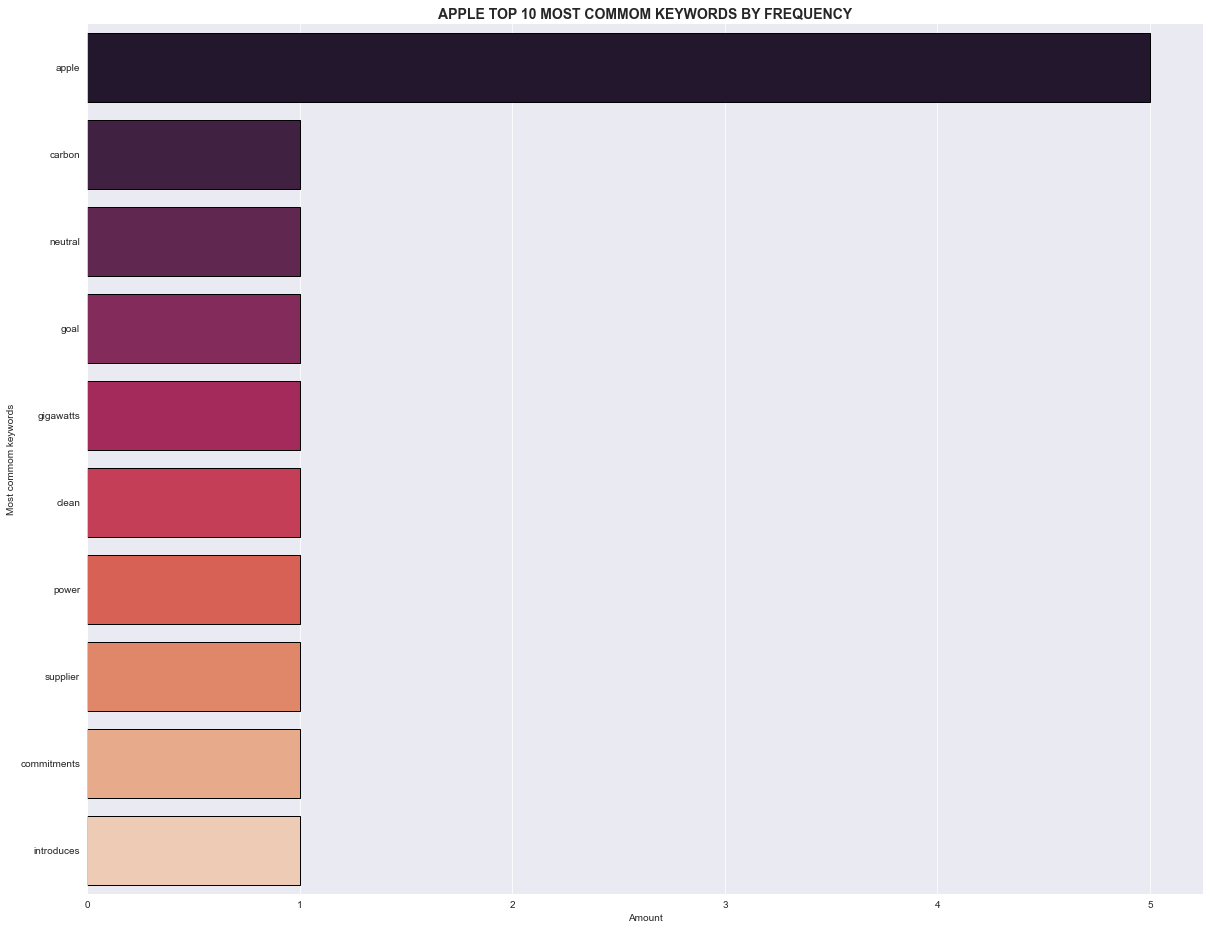

In [6]:
df = pd.DataFrame(words, columns =['Most commom keywords', 'Amount'])
rcParams['figure.figsize'] = 20,16
sns.set_style('darkgrid')
ax = sns.barplot(x='Amount', y='Most commom keywords', data= df[:10], palette='rocket', edgecolor='k')
ax.set_title('APPLE TOP 10 MOST COMMOM KEYWORDS BY FREQUENCY', fontsize=14, weight='bold')
ax.set_xlabel('Amount')
sns.despine();
plt.savefig('apple_keywords.png')

In [7]:
doc = list(nlp(message_text).noun_chunks)

In [13]:
import sys

orig_stdout = sys.stdout
f = open(
    'apple.txt', 'w'
)
sys.stdout = f


for token in doc:
    if 'Apple' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [14]:
df = pd.read_table(
    'apple.txt', 
    header=None,
    encoding= 'cp1252'
)
df.rename(
    columns={
        0: 'Apple'
    },
    inplace=True, 
    errors='raise'
)
dff = pd.DataFrame(
    data=df.Apple.value_counts()
).rename(
    columns={'Apple': 'Frequency'}
).rename_axis(
    'Term'
)
dff.head()

,Frequency
Term,
Apple,1
doubling supplier commitments',1
'Apple introduces,1
at\xa0Apple,1
'Apple Acquires DVD Authoring Technology,1


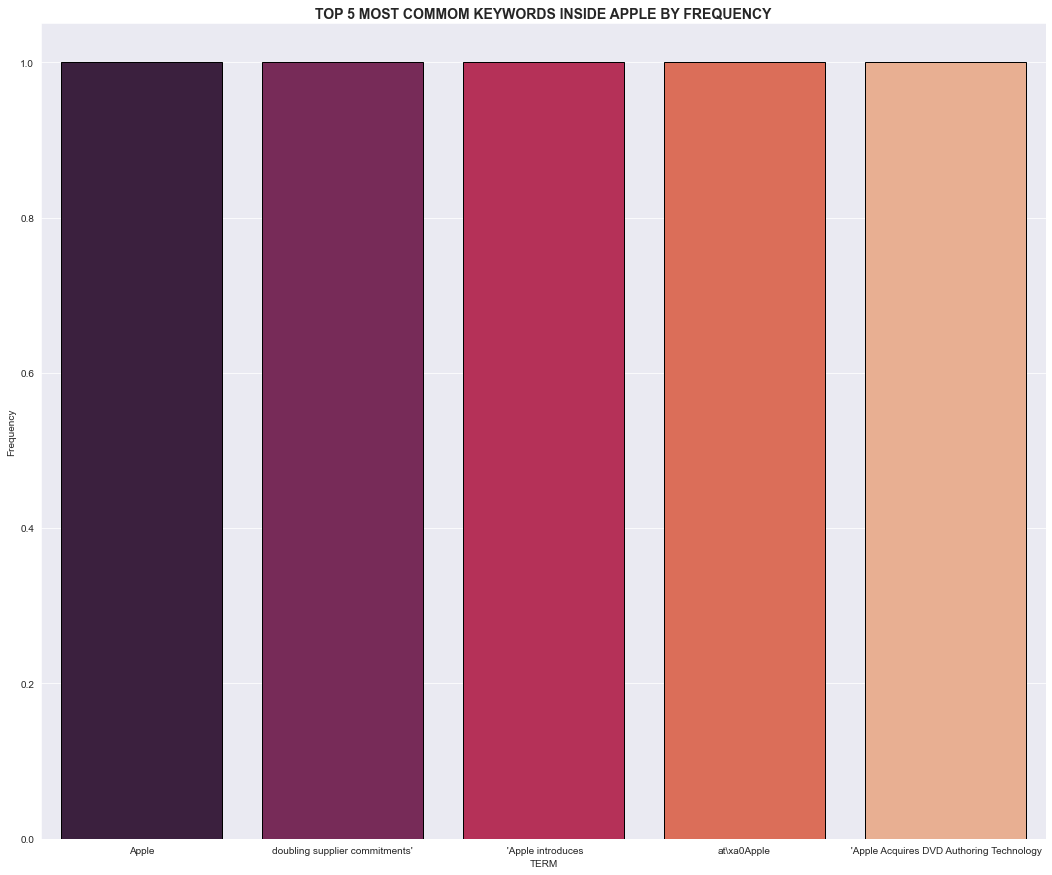

In [16]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff[:5], 
    x=dff.index[:5], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP 5 MOST COMMOM KEYWORDS INSIDE APPLE BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'most_commom_keyword.png'
)

In [18]:
orig_stdout = sys.stdout
f = open(
    'carbon.txt', 'w'
)
sys.stdout = f


for token in doc:
    if 'carbon' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [19]:
df2 = pd.read_table(
    'carbon.txt', 
    header=None
)
df2.rename(
    columns={
        0: 'Carbon'
    },
    inplace=True, 
    errors='raise'
)
dff2 = pd.DataFrame(
    data=df2.Carbon.value_counts()
).rename(
    columns={'Carbon': 'Frequency'}
).rename_axis(
    'Term'
)
dff2.head()

,Frequency
Term,
2030 carbon neutral goal,1


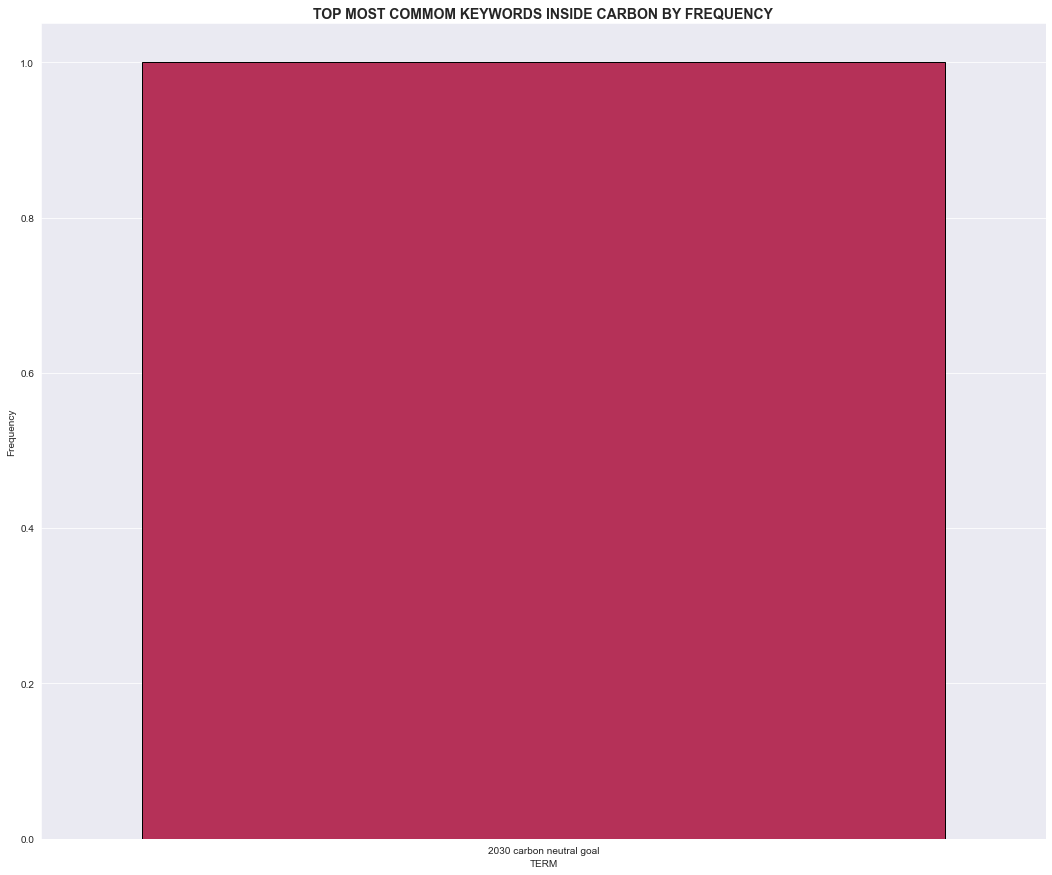

In [20]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff2[:7], 
    x=dff2.index[:7], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP MOST COMMOM KEYWORDS INSIDE CARBON BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'second_most_commom_keyword.png'
)

In [24]:
orig_stdout = sys.stdout
f = open(
    'clean.txt', 'w'
)
sys.stdout = f


for token in doc:
    if 'clean' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [26]:
df4 = pd.read_table(
    'clean.txt', 
    header=None,
    encoding= 'cp1252'
)
df4.rename(
    columns={
        0: 'Clean'
    },
    inplace=True, 
    errors='raise'
)
dff4 = pd.DataFrame(
    data=df4.Clean.value_counts()
).rename(
    columns={'Clean': 'Frequency'}
).rename_axis(
    'Term'
)
dff4.head()

,Frequency
Term,
clean power,1


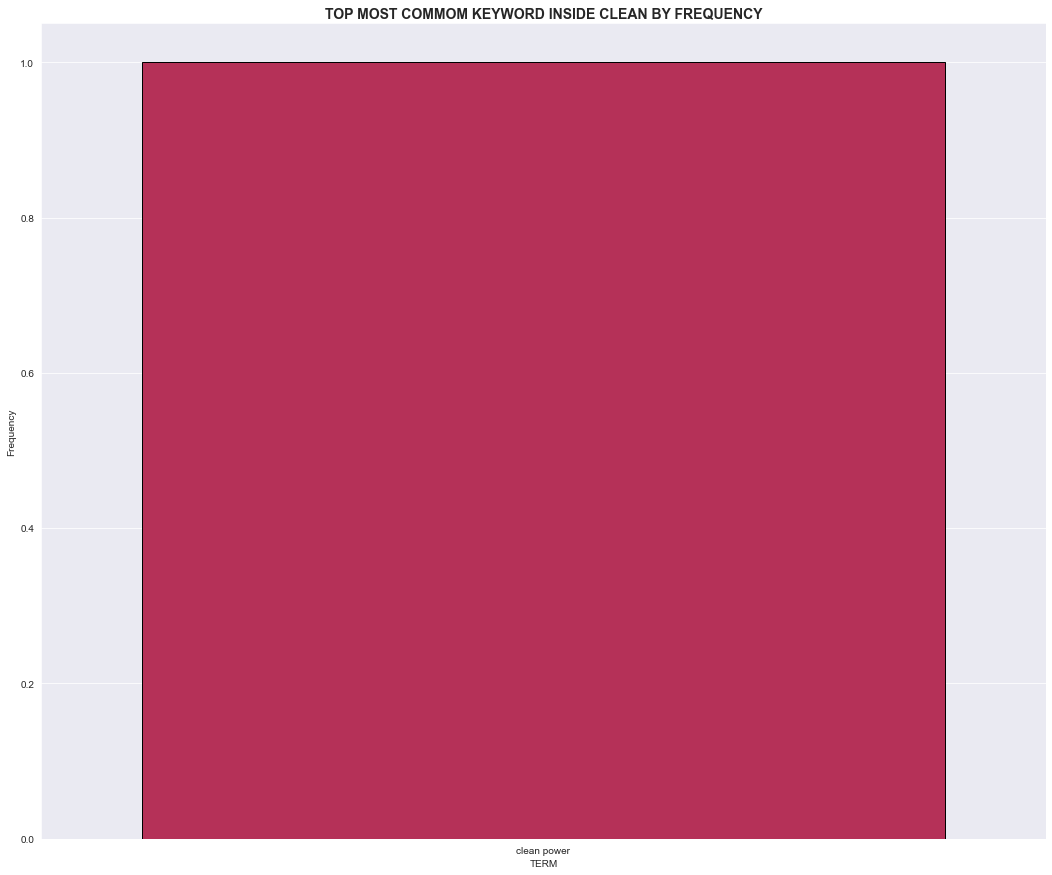

In [27]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff4[:8], 
    x=dff4.index[:8], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP MOST COMMOM KEYWORD INSIDE CLEAN BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'third_most_commom_keyword.png'
)

In [29]:
orig_stdout = sys.stdout
f = open(
    'supplier.txt', 'w'
)
sys.stdout = f


for token in doc:
    if 'supplier' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [30]:
df5 = pd.read_table(
    'supplier.txt', 
    header=None,
    encoding= 'cp1252'
)
df5.rename(
    columns={
        0: 'Supplier'
    },
    inplace=True, 
    errors='raise'
)
dff5 = pd.DataFrame(
    data=df5.Supplier.value_counts()
).rename(
    columns={'Supplier': 'Frequency'}
).rename_axis(
    'Term'
)
dff5.head()

,Frequency
Term,
doubling supplier commitments',1
'Apple introduces,1


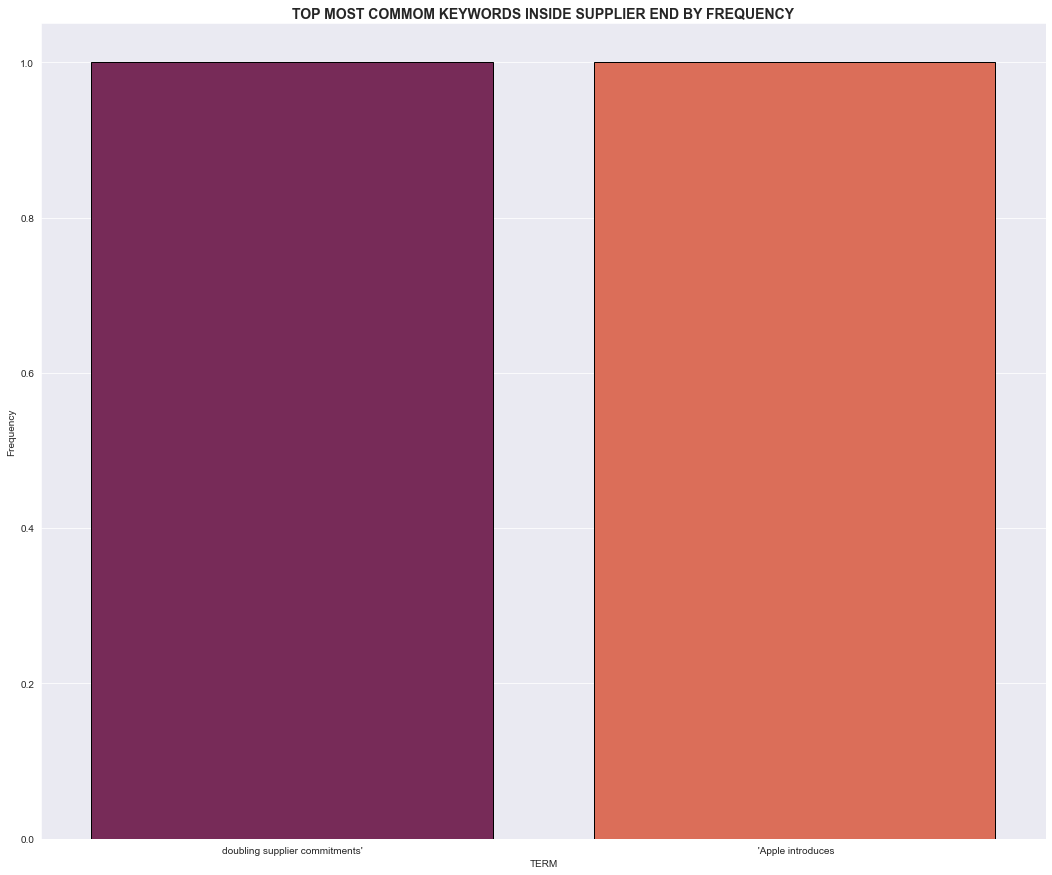

In [31]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff5[:8], 
    x=dff5.index[:8], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP MOST COMMOM KEYWORDS INSIDE SUPPLIER END BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'fourth_most_commom_keyword.png'
)